# Cluster SO/DO Extrema for Line 66

In [1]:
# imports
from importlib import reload

import numpy as np
from scipy.interpolate import interp1d

import pandas

from matplotlib import pyplot as plt
import matplotlib as mpl
import matplotlib.gridspec as gridspec

import seaborn as sns

from siosandbox.cugn import clusters
from siosandbox.cugn import grid_utils
from siosandbox.cugn import io as cugn_io
from siosandbox import plot_utils

# defs

In [2]:
def show_metrics(ds, grid_extrem, ds_in_tcluster, in_cluster):
    #
    fig = plt.figure(figsize=(12,12))
    plt.clf()

    gs = gridspec.GridSpec(2,3)

    for ss, metric in enumerate(['SO', 'doxy', 'N', 'T', 'chla', 'lon']):
        ax = plt.subplot(gs[ss])

        if metric == 'T':
            ds_metric = 'temperature'
        elif metric == 'chla':
            ds_metric = 'chlorophyll_a'
        else:
            ds_metric = metric

        # Plot all
        srt = np.argsort(ds.time[ds_in_tcluster].values)
        plt_depth = 0
        if metric in ['lon']:
            ax.plot(ds.time[ds_in_tcluster][srt], ds[ds_metric][ds_in_tcluster][srt], 'k-')
        else:
            ax.plot(ds.time[ds_in_tcluster][srt], ds[ds_metric][plt_depth,ds_in_tcluster][srt], 'k-')

        for depth, clr in zip(np.arange(3), ['b', 'g', 'r']):
            at_d = grid_extrem.depth[in_cluster] == depth
            ax.scatter(grid_extrem.time[in_cluster][at_d], grid_extrem[metric][in_cluster][at_d], color=clr)

        ax.set_ylabel(metric)

        plot_utils.set_fontsize(ax, 13.)

    plt.show()

# Load up

In [3]:
line = '66'

# Load
items = cugn_io.load_line(line)
grid_tbl = items['grid_tbl']
ds = items['ds']

# Fill
grid_utils.fill_in_grid(grid_tbl, ds)

In [4]:
perc = 80.
grid_outliers, _, _ = grid_utils.gen_outliers(line, perc)

In [5]:
extrem = grid_outliers.SO > 1.1
grid_extrem = grid_outliers[extrem].copy()
grid_extrem.head()

,depth,profile,row,col,doxy,doxy_p,time,lon,lat,z,CT,SA,sigma0,SO,N,chla,T
385,0,32562,5,22,299.091687,99.656947,2017-05-09 20:54:33,-123.871460,35.963010,10,11.977410,33.008581,24.936519,1.117762,3.370108,4.833602,11.944455
386,0,32563,5,22,303.102459,99.828473,2017-05-09 23:40:16,-123.903672,35.947077,10,11.986590,33.027397,24.949276,1.133126,3.553703,5.180007,11.954000
387,0,32564,6,22,297.899435,99.774775,2017-05-10 02:32:55,-123.934190,35.933057,10,12.021725,33.049356,24.959621,1.114672,7.840256,2.543626,11.989500
475,0,32652,11,22,288.285375,99.038462,2017-05-20 03:52:16,-124.809317,35.530428,10,13.038091,33.281367,24.943123,1.103423,1.660360,1.974078,13.008333
476,0,32653,11,22,290.519656,99.759615,2017-05-20 06:38:19,-124.789830,35.538175,10,13.071683,33.279357,24.934974,1.112721,0.835605,2.865857,13.041800


# Cluster

In [6]:
clusters.generate_clusters(grid_extrem)

Found 34 unique clusters


In [7]:
cluster_stats = clusters.cluster_stats(grid_extrem)

# Plot a few

In [8]:
uni_cidx, cnt_cidx = np.unique(grid_extrem.cluster, return_counts=True)

In [9]:
uni_cidx[0:3], cnt_cidx

(array([-1,  0,  1]),
 array([138,   6,  14,   6,   5,   5,   6,   7,  19,  35,  18,  69,   7,
          6,   6,  10,   9,  13,  21,   5,  13,  11,  13,  11,   9,   6,
          7,   6,   5,  10,   6,   5,  18,   8]))

## SO

In [107]:
cidx = 0 # brief event; high DO, far off-shore [May 2017]
cidx = 1 # off-shore, intense event, high DO, modest N [July 1 2017]
cidx = 2 # DO, Chla spikes; low T, modest N [mid Nov 2017] -- worth showing
cidx = 3 # Same as cidx=2, effectively
cidx = 4 # brief, uninteresting [late April 2018]
cidx = 5 # brief, high Chla [late May 2018]
cidx = 6 # same event as cidx=5
cidx = 7 # on-shore, high DO, Chla, low T [late June 2018] -- worth showing
cidx = 8 # on-shore, high DO, Chla, low T [mid Aug 2018] -- worth showing
cidx = 9 # end of cidx=8 event
cidx = 10 # Late September, impressive; low T, high Chla, N -- worth showing
cidx = 11 # short; brief spikes too [end April 2019]
cidx = 12 # brief [early May 2019]
cidx = 13 # another brief episode [early May 2019]
cidx = 14 # DO spike; no Chla measured [early June 2019]
cidx = 15 # brief, uninteresting [late July 2019]
cidx = 16 # DO spike, low T; high N [late Aug 2019] -- worth showing
cidx = 17 # part of cidx=16
cidx = 18 # weak [mid Oct 2019]
cidx = 19 # Chla spike, low T [mid Oct 2019]
cidx = 20 # gappy data; junk [early June 2020]  CHECK WITH DAN
cidx = 21 # DO spike, no Chla measured [mid June 2020]
cidx = 22 # short DO spike, no Chla measured [mid July 2020]
cidx = 23 # uninteresting, no Chla measured [mid July 2020]
#cidx = 24 # short episode [early August 2020]

#cidx = 2 # DO, Chla spikes; low T, modest N [mid Nov 2017] -- worth showing
#cidx = 7 # on-shore, high DO, Chla, low T [late June 2018] -- worth showing
#cidx = 8 # on-shore, high DO, Chla, low T [mid Aug 2018] -- worth showing
#cidx = 10 # Late September, impressive; low T, high Chla, N -- worth showing
#cidx = 16 # DO spike, low T; high N [late Aug 2019] -- worth showing

in_cluster = grid_extrem.cluster == cidx

tmin = grid_extrem.time[in_cluster].min() - pandas.Timedelta('2W')
tmax = grid_extrem.time[in_cluster].max() + pandas.Timedelta('2W')
tmin, tmax

#in_cluster = (grid_extrem.time > tmin) & (grid_extrem.time < tmax)#+pandas.Timedelta('2W'))

(Timestamp('2020-07-08 22:01:23'), Timestamp('2020-08-07 04:10:20'))

In [108]:
ds_in_tcluster = (ds.time >= tmin) & (ds.time <= tmax)
np.sum(ds_in_tcluster.values)

289

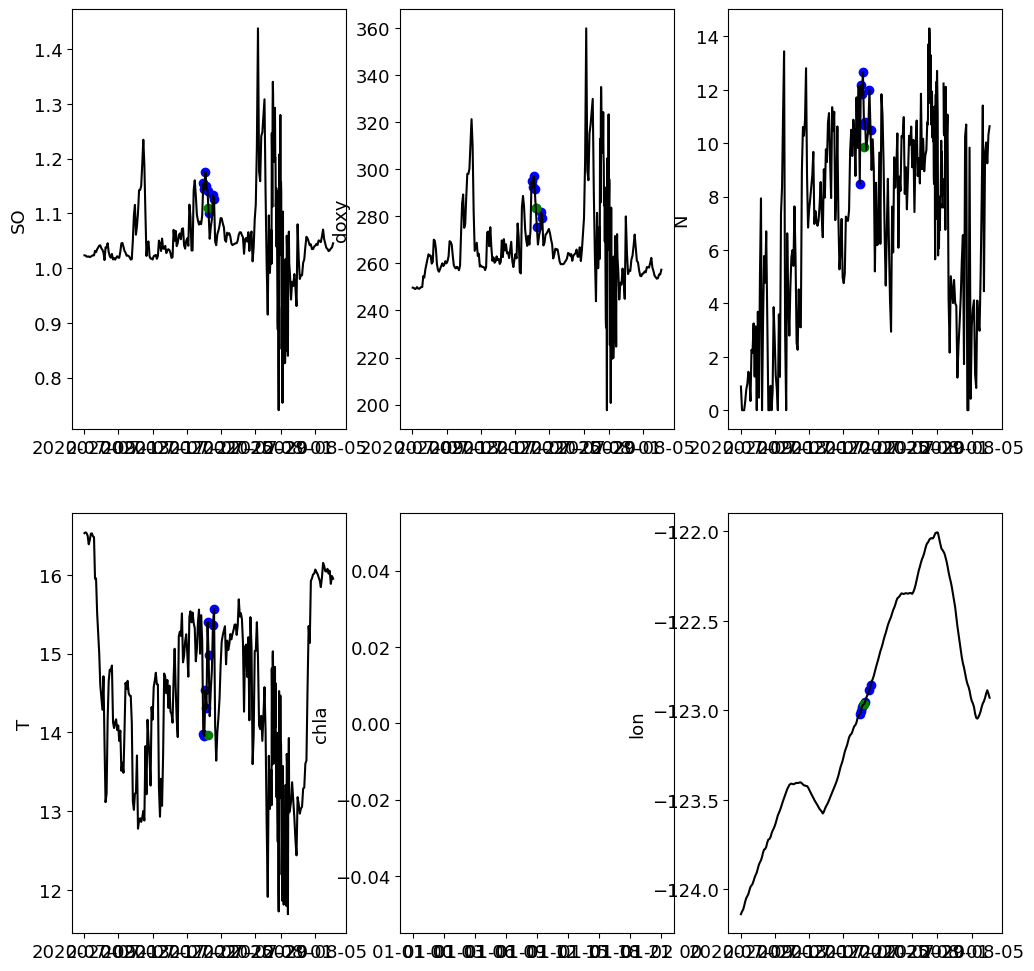

In [109]:
show_metrics(ds, grid_extrem, ds_in_tcluster, in_cluster)